# 1. Data Preprocessing:
*필요 library:
    seaborn, tensorflow, pytorch, torchvision, imbalanced-learn
    
### 1) Getting data

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os, glob

In [2]:
#파일 경로 가져오기
PATH = './train/'

image_dirs = os.listdir(PATH)
image_paths = dict()
for image_dir in tqdm(image_dirs):
    try:
        files = glob.glob(PATH + image_dir+"/*.png") 
        image_paths[image_dir] = [file for file in files]
    except:
        FileNotFoundError

100%|██████████| 6/6 [00:00<00:00, 6027.74it/s]


In [3]:
#이미지 파일 & Label & filename & path 가져오기
import PIL
from PIL import Image
import torch
import torchvision
from torch.utils.data import  TensorDataset, DataLoader
from keras.preprocessing.image import img_to_array


data = dict()
data['label'] = []
data['filename'] = []
data['image_arr'] = []
for label,paths in tqdm(image_paths.items()):
    for path in paths:
        img = Image.open(path)
        data['filename'].append(path)
        img_arr = numpy.array(img)
        data['image_arr'].append(img_arr)
        data['label'].append(label)

  0%|          | 0/6 [00:00<?, ?it/s]


NameError: name 'numpy' is not defined

In [4]:
#파일 정보 확인 및 이미지 확인, data imbalance 확인 
from collections import Counter
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array,load_img
print('number of samples: ', len(data['image_arr']))
print('dict keys: ', list(data.keys()))
print('image shape: ', data['image_arr'][0].shape)
count_label = Counter(data['label'])
print('Original dataset shape')
print(sorted(count_label.items()))

#show images
fig, axes = plt.subplots(1, len(count_label.items()))
fig.set_size_inches(15,4)
fig.tight_layout()
 
for ax, label in zip(axes, np.unique(data['label'])):
    idx = data['label'].index(label)
    ax.imshow(array_to_img(data['image_arr'][idx]))
    ax.axis('off')
    ax.set_title(label)

number of samples:  273
dict keys:  ['label', 'filename', 'image_arr']


AttributeError: shape

C:\Users\82109\anaconda3\envs\data\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


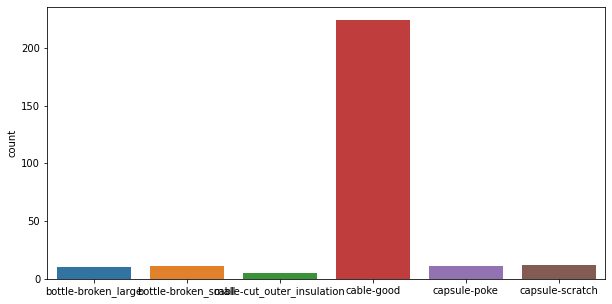

In [20]:
#imbalance 시각화
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(data['label'])
plt.show()

### 2) Data Augmentation
* 왜곡된 image를 가장 많은 label 수에 맞추어 (0 SPOT, 1140개) directory에 바로 생성.

In [21]:
#generator 생성
data_gen = ImageDataGenerator(rotation_range=90, 
                               width_shift_range= 0.1, 
                               height_shift_range= 0.1,
                               zoom_range=0.1,
                               horizontal_flip = True,
                               vertical_flip= True,
                               fill_mode='nearest'
                              )

label_count = Counter(data['label'])
label_max = max(label_count.values())


i=0
for img,label in tqdm(zip(data['image_arr'],data['label'])):
    x = img
    x = x.reshape((1,)+x.shape)
    img_count = label_count[label] #현재 label을 가진 사진 수
    if img_count < label_max:
        i = label_max-img_count #해당 label에 대해 추가로 생성해야 하는 사진 수 (가장 많은 label의 사진 수에서 뺀 값)
        i = i//img_count + 1 #이 사진으로 만들어야 하는 보정 사진 수
        for batch in data_gen.flow(x,
                                 batch_size=1,
                                 save_to_dir=f"{PATH}{label}/", #기존 dir에 생성.
                                 save_prefix='made_'+label[0],
                                 save_format='png'):
            
            
            i-=1
            if i<0:
                break



0it [00:00, ?it/s]C:\Users\82109\anaconda3\envs\data\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 3, 900, 900) (900 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
0it [00:00, ?it/s]


ValueError: Unsupported channel number: 900

In [20]:
label_max = max(label_count.values())
label_max

220